# Desafío - Boosting Classifiers
- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Boosting Classifiers.

## Requerimientos
- Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañía de telecomunicaciones.
- El archivo contiene 3.333 registros y 20 atributos.
- El vector objetivo a modelar es la _tasa de rotación_ entre los clientes de una compañía de telecomunicaciones `churn`.
- Los atributos existentes hacen referencia a características de la cuenta de cada cliente.

**Lista de atributos**:
- `State`: Estado de Estados Unidos.
- `Account Length`: Tiempo en que la cuenta ha sido activada.
- `Area Code`: Código de área.
- `International plan`: Plan internacional activado.
- `Voice mail plan`: Plan de mensajes de voz activado.
- `number_vmail_messages`: Cantidad de mensajes de voz.
- `total_day_minutes`: Cantidad de minutos ocupados en la mañana.
- `total_day_calls`: Cantidad de llamadas realizadas en la mañana.
- `total_day_charge`: Cobros realizados en la mañana.
- `total_eve_minutes`: Cantidad de minutos ocupados en la tarde.
- `total_eve_calls`: Cantidad de llamadas realizadas en la tarde.
- `total_eve_charge`: Cobros realizados en la tarde.
- `total_night_calls`: Cantidad de llamadas realizadas en la noche.
- `tota_night_minutes`: Cantidad de minutos ocupados en la noche.
- `total_night_charge`: Cobros realizados en la noche.
- `total_intl_minutes`: Cantidad de minutos ocupados en llamadas internacionales.
- `total_intl_calls`: Cantidad de llamadas internacionales realizadas.
- `total_intl_charge`: Cobros realizados por llamadas internacionales.
- `churn`: 1 si el cliente se cambió de compañía, 0 de los contrario.


Los datos provienen del paquete AppliedPreditiveModeling de R

### Ejercicio 1: Preprocesamiento
- Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
- En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
    - Para las variables categóricas, recodifíquelas en variables binarias.
    - Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [1]:
# Utiliza esta celda para importar los módulos necesarios y el set de datos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

plt.style.use('ggplot')

df = pd.read_csv('Datasets/churn_train.csv').drop(columns = 'Unnamed: 0')
display(df.head())
print(df.shape)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


(3333, 20)


In [2]:
# Utiliza esta celda para graficar las curvas de densidad de variables numéricas
df_numericas = df.select_dtypes(np.number)
df_numericas.shape

(3333, 15)

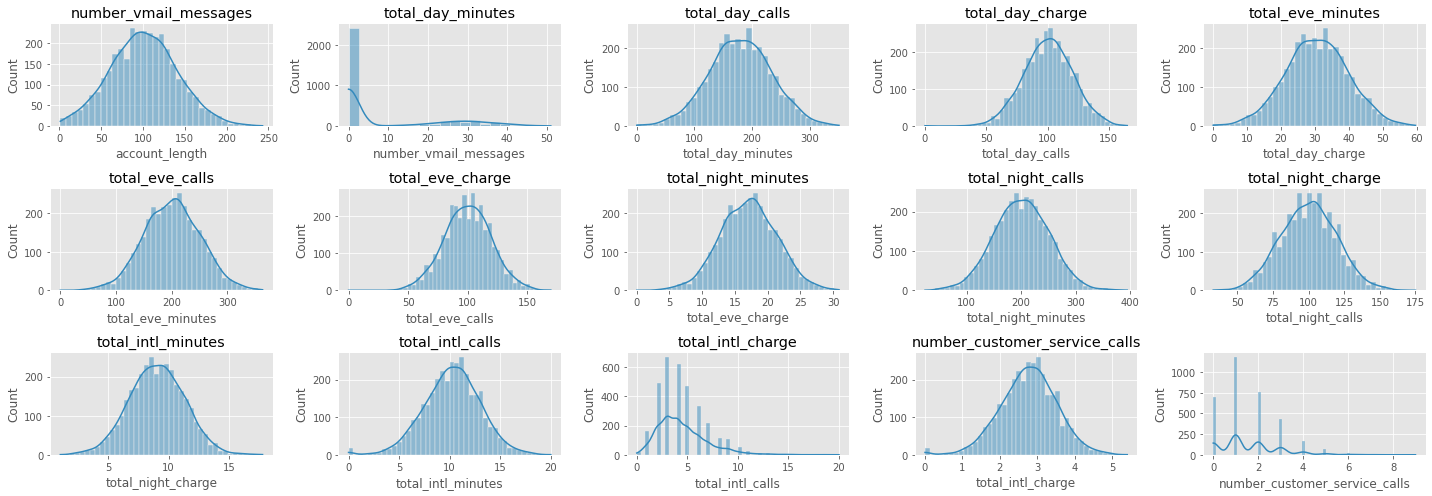

In [3]:
plt.figure(figsize = (20,7))
for i, (colname, serie) in enumerate(df_numericas.iteritems()):
    plt.title(colname)
    plt.subplot(3, 5, i + 1)
    sns.histplot(serie, kde = True)
    
plt.tight_layout()

In [4]:
# Utiliza esta celda para graficar las frecuencias en variables de tipo object
df_object = df.select_dtypes('object')
df_object.shape

(3333, 5)

In [5]:
df_object.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

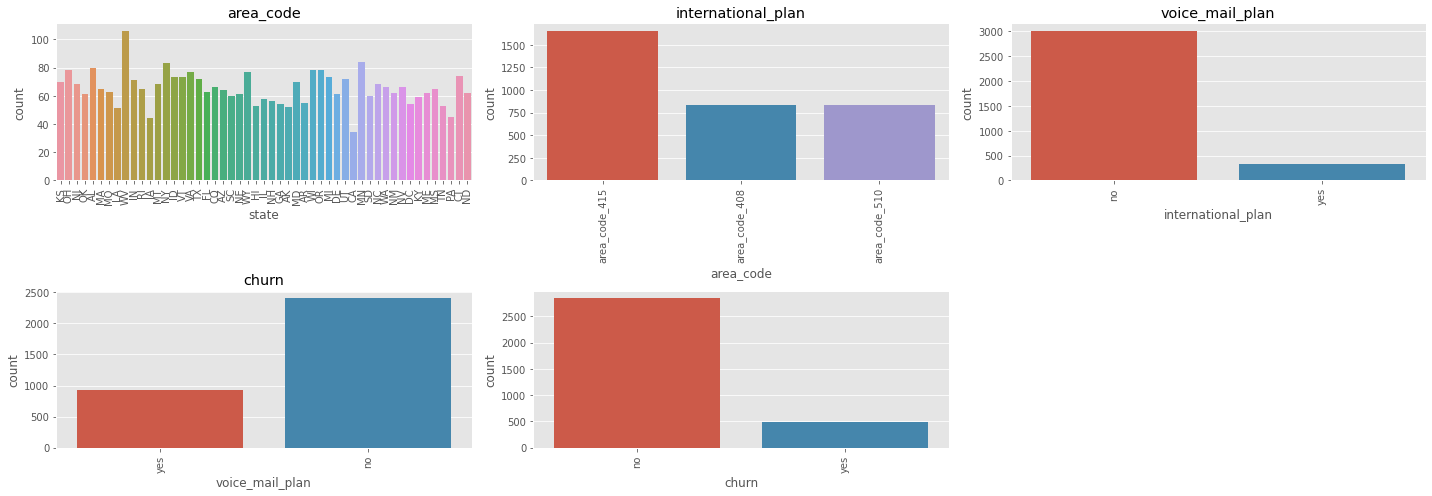

In [6]:
plt.figure(figsize = (20, 7))
for i, (colname, serie) in enumerate(df_object.iteritems()):
    plt.title(colname)
    plt.subplot(2,3,i+1)
    sns.countplot(serie)
    plt.xticks(rotation = 90)
    
plt.tight_layout()

**Comentarios**

In [7]:
# Utiliza esta celda para generar variables binarias omitiendo una categoría
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,1,0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,1,0,0,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,1,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,0,1,0,0


### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting
- Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible.
- Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:
```python
adaboost_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000]
}
gradientboost_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000],
    'subsample': [0.1,0.5,0.9]
}
```
- Si el tiempo de computación es alto, puede implementar la búsqueda con 2 validación cruzada.
- Reporte las métricas para los mejores modelos.

In [8]:
# Utiliza esta celda para generar las sub muestras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

X = df_dummies.drop(columns = 'churn_yes')
y = df_dummies['churn_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 11238)

In [9]:
%%time
from sklearn.model_selection import GridSearchCV

adaboost_hiperparams = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}

grilla_adaboost = GridSearchCV(AdaBoostClassifier(random_state = 11238), adaboost_hiperparams, cv = 2).fit(X_train, y_train)

CPU times: total: 54.1 s
Wall time: 54.1 s


In [10]:
# Utiliza esta celda para entrenar la grilla de gradient boost
gradientboost_hiperparams = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1, 0.5, 0.9]}
grilla_gradientboost = GridSearchCV(GradientBoostingClassifier(random_state = 11238), gradientboost_hiperparams, cv = 2).fit(X_train, y_train)

In [11]:
# Utiliza esta celda para mostrar la mejor combinación de hiperparámetros degrilla_adaboostlo y puntaje asociado
print(grilla_adaboost.best_params_)
print(grilla_adaboost.best_score_)
print(grilla_gradientboost.best_params_)
print(grilla_gradientboost.best_score_)

{'learning_rate': 0.01, 'n_estimators': 2000}
0.8732640393013802
{'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 0.9}
0.951184127350847


In [12]:
# Utiliza esta celda para generar predicciones del mejor modelo de adaboost
yhat_adaboost = grilla_adaboost.best_estimator_.predict(X_test)

In [13]:
# Utiliza esta celda para generar predicciones del mejor modelo de gradientboost
yhat_gradientboost = grilla_gradientboost.best_estimator_.predict(X_test)

**Comentarios**

### Ejercicio 3: Principales factores asociados
- Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.
- **Tip**: Pueden implementar la función `plot_importance` que se encuentra en la lectura de Bagging y Random Forest.

In [14]:
# Utiliza esta celda para definir la función plot_importance
def plot_importance(fit_model, feat_names):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

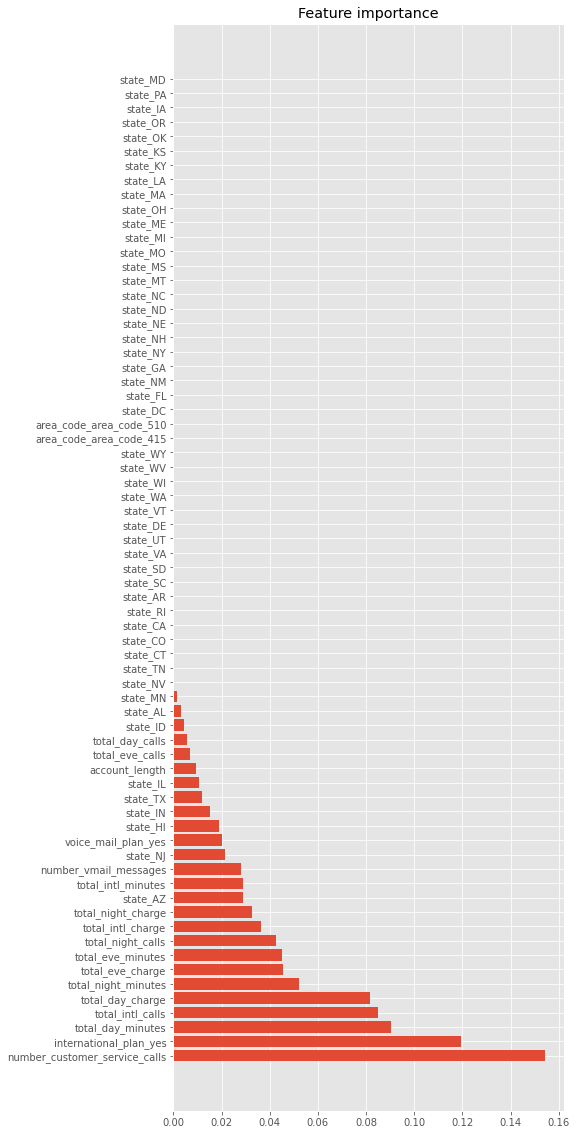

In [15]:
# Utiliza esta celda para llamar a la función utilizando el modelo de mejor desempeño
plt.figure(figsize=(7,20))
plot_importance(grilla_adaboost.best_estimator_, X_train.columns)

**Comentarios**

### Ejercicio 4: Probabilidad de fuga
- El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga.
- Implemente el modelo predictivo con el archivo `churn_test.csv`.
- Recuerde que para obtener la probabilidad de clase, debe utilizar la función `predict_proba` del modelo.

In [16]:
# Utiliza esta celda para leer el set de datos para test y binarizar
df_test = pd.read_csv('Datasets/churn_test.csv').drop(columns='Unnamed: 0')

df_dummies_test = pd.get_dummies(df_test, drop_first=True)
df_dummies_test.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,...,0,0,0,0,0,0,1,0,0,0
1,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,...,0,0,0,0,0,0,1,0,0,0
2,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,...,0,0,0,0,0,0,0,0,1,0
3,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,...,0,0,0,0,0,1,0,0,0,0
4,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,...,0,0,0,0,0,1,0,0,0,0


In [17]:
# Utiliza esta celda para separar los valores del vector objetivo y predecir probs
X = df_dummies_test.drop(columns = 'churn_yes')
y = df_dummies_test['churn_yes']

adaboost_proba = grilla_adaboost.best_estimator_.predict_proba(X)
gradientboost_proba = grilla_gradientboost.best_estimator_.predict_proba(X)

In [18]:
# Utiliza esta celda para generar un subset con los estados y las probabilidades
df_state = X.filter(regex='state', axis=1)
df_state.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Utiliza esta celda para obtener la prob de fuga por estado, ordenando de menor a mayor

df_state['prob_0_adaboost'] = [i[0] for i in adaboost_proba]

df_state['prob_1_adaboost'] = [i[1] for i in adaboost_proba]
df_state.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,prob_0_adaboost,prob_1_adaboost
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.547656,0.452344
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.544239,0.455761
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.498010,0.501990
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.527828,0.472172
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.545710,0.454290


In [20]:
# Utiliza esta celda para graficar la prob de fuga promedio por estado
estados = df_state.filter(regex='state').columns

df_acum = pd.DataFrame()
for estado in estados:
    
    df_tmp = df_state[df_state[estado] == 1][['prob_0_adaboost', 'prob_1_adaboost']].mean().to_frame().T.assign(state=estado)
    df_acum = df_acum.append(df_tmp)


**Comentarios**

In [21]:
df_acum.sort_values(by='prob_1_adaboost', ascending=False).head(3)

,prob_0_adaboost,prob_1_adaboost,state
0,0.517486,0.482514,state_NJ
0,0.524480,0.475520,state_OK
0,0.524483,0.475517,state_KS


In [22]:
df_acum = df_acum.sort_values(by='prob_1_adaboost')

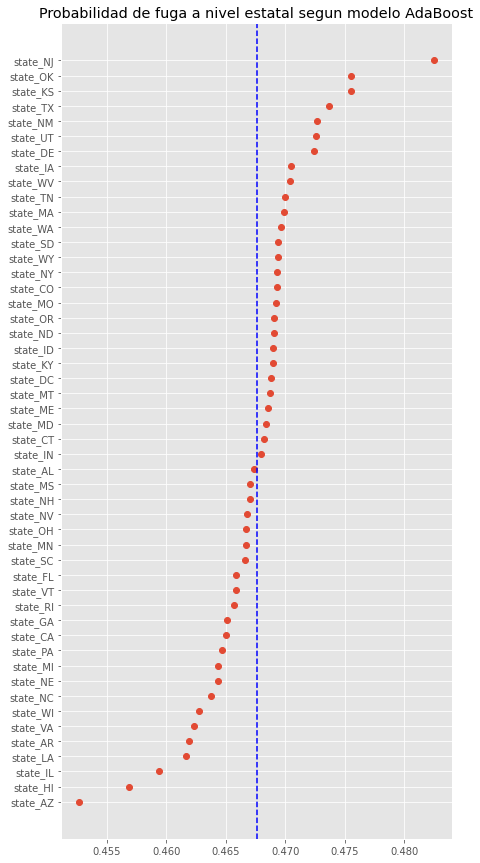

In [23]:
plt.figure(figsize=(7,15))
plt.title("Probabilidad de fuga a nivel estatal segun modelo AdaBoost")
plt.plot(df_acum['prob_1_adaboost'].values, df_acum['state'], 'o')
plt.axvline(df_acum['prob_1_adaboost'].mean(), color='blue', ls='--')